82-87 $m^2$

In [5]:
# !pip install --upgrade pip
# !pip install pandas
# !cp ./fp_refined.csv /data

In [6]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt


import pandas as pd

from tqdm.notebook import trange, tqdm

tf.enable_eager_execution()

In [7]:
path_csv = "/data/fp_refined.csv"

df = pd.read_csv(path_csv)
df = df.set_index("id_after")
df

,Path,index,APT_ID,Date,year,norm_year,yyyymm,N_Housings,Max_Floors,Min_Floors,...,sido_cluster_code,sido_sgg_name,FP_ID,Area,norm_log_area,area_85,Entrance,Rooms,Baths,N_Units
id_after,,,,,,,,,,,,,,,,,,,,,
8928_160,/data/fp_img_processed/8928_160.png,1,8928,2004-06-01T00:00:00Z,2004,0.70,200406,212,22,20,...,0,서울시 강남구,160,134.30,1.313282,False,계단식,4,2,84
8928_183,/data/fp_img_processed/8928_183.png,2,8928,2004-06-01T00:00:00Z,2004,0.70,200406,212,22,20,...,0,서울시 강남구,183,153.80,1.702528,False,계단식,4,2,44
8928_201A,/data/fp_img_processed/8928_201A.png,3,8928,2004-06-01T00:00:00Z,2004,0.70,200406,212,22,20,...,0,서울시 강남구,201A,170.32,1.995448,False,계단식,4,2,42
8928_204B,/data/fp_img_processed/8928_204B.png,4,8928,2004-06-01T00:00:00Z,2004,0.70,200406,212,22,20,...,0,서울시 강남구,204B,168.42,1.963240,False,계단식,4,2,42
960_35,/data/fp_img_processed/960_35.png,5,960,1982-11-01T00:00:00Z,1982,0.26,198211,5040,5,5,...,0,서울시 강남구,35,35.64,-2.495452,False,계단식,2,1,530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115454_21D,/data/fp_img_processed/115454_21D.png,50577,115454,2017-03-01T00:00:00Z,2017,0.96,201703,72,4,4,...,8,제주도 제주시,21D,14.50,-5.077429,False,계단식,2,1,20
115454_34E,/data/fp_img_processed/115454_34E.png,50578,115454,2017-03-01T00:00:00Z,2017,0.96,201703,72,4,4,...,8,제주도 제주시,34E,21.57,-3.937185,False,계단식,2,1,4
115454_36B,/data/fp_img_processed/115454_36B.png,50579,115454,2017-03-01T00:00:00Z,2017,0.96,201703,72,4,4,...,8,제주도 제주시,36B,24.86,-3.529623,False,계단식,3,2,16


In [8]:
df85 = df[(df.Area > 82) & (df.Area < 87)].copy()
df85

,Path,index,APT_ID,Date,year,norm_year,yyyymm,N_Housings,Max_Floors,Min_Floors,...,sido_cluster_code,sido_sgg_name,FP_ID,Area,norm_log_area,area_85,Entrance,Rooms,Baths,N_Units
id_after,,,,,,,,,,,,,,,,,,,,,
1298_116,/data/fp_img_processed/1298_116.png,19,1298,1983-10-01T00:00:00Z,1983,0.28,198310,940,14,13,...,0,서울시 강남구,116,83.17,-0.062487,False,복도식,3,1,280
1303_107,/data/fp_img_processed/1303_107.png,23,1303,1983-10-01T00:00:00Z,1983,0.28,198310,1060,15,13,...,0,서울시 강남구,107,83.21,-0.061106,False,복도식,3,1,310
1307_114,/data/fp_img_processed/1307_114.png,27,1307,1983-10-01T00:00:00Z,1983,0.28,198310,900,15,15,...,0,서울시 강남구,114,83.70,-0.044249,False,복도식,3,1,270
28_107,/data/fp_img_processed/28_107.png,31,28,1984-03-01T00:00:00Z,1984,0.30,198403,678,15,12,...,0,서울시 강남구,107,84.60,-0.013543,True,계단식,3,1,2
881_101,/data/fp_img_processed/881_101.png,55,881,1991-01-01T00:00:00Z,1991,0.44,199101,234,15,12,...,0,서울시 강남구,101,84.90,-0.003380,True,계단식,3,2,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106163_110A,/data/fp_img_processed/106163_110A.png,50572,106163,2014-08-01T00:00:00Z,2014,0.90,201408,411,12,10,...,8,제주도 제주시,110A,84.95,-0.001689,True,계단식,3,2,293
106163_110C,/data/fp_img_processed/106163_110C.png,50573,106163,2014-08-01T00:00:00Z,2014,0.90,201408,411,12,10,...,8,제주도 제주시,110C,84.98,-0.000676,True,계단식,3,2,12
105883_108A,/data/fp_img_processed/105883_108A.png,50574,105883,2013-01-01T00:00:00Z,2013,0.88,201301,448,12,10,...,8,제주도 제주시,108A,84.36,-0.021699,True,계단식,3,2,400


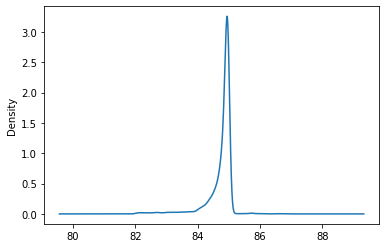

In [9]:
df85["Area"].plot.kde()

In [10]:
brand_cols = [
    "brand_booyoung",
    "brand_humansia",
    "brand_jugong",
    "brand_weve",
    "brand_ipark",
    "brand_epyeonhan",
    "brand_lottecastle",
    "brand_thesharp",
    "brand_prugio",
    "brand_raemian",
    "brand_hillstate",
    "brand_xi",
]

df_brand = (
    pd.read_csv("apt_brand.csv", usecols=["ID"] + brand_cols,)
    .fillna(0)
    .astype(int)
    .set_index("ID")
)
df_brand

,brand_booyoung,brand_humansia,brand_jugong,brand_weve,brand_ipark,brand_epyeonhan,brand_lottecastle,brand_thesharp,brand_prugio,brand_raemian,brand_hillstate,brand_xi
ID,,,,,,,,,,,,
8928,0,0,0,0,0,0,0,0,0,0,0,1
107513,0,0,0,0,0,0,0,0,0,0,0,0
960,0,0,1,0,0,0,0,0,0,0,0,0
1289,0,0,1,0,0,0,0,0,0,0,0,0
1298,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
116489,0,0,0,0,0,0,0,0,0,0,0,0
112269,0,0,0,0,0,0,0,0,0,0,0,0
106163,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
df_dataset = pd.read_csv(
    "/data/fp_dataset.csv", usecols=["ID", "test", "train"]
).set_index("ID")
df_dataset

,test,train
ID,,
23112_103F,0,1
730_107,0,1
2819_58A,0,1
107899_115B,1,0
109247_117A,0,1
...,...,...
105106_105A,0,1
8982_102A1,1,0
26144_132B,0,1


In [12]:
df_merge = df85.merge(df_brand, how="left", left_on="APT_ID", right_index=True).merge(
    df_dataset, how="left", left_index=True, right_index=True
)

In [17]:
rows = df_merge.loc[
    :,
    ["Path", "norm_year", "sido_cluster_code", "norm_log_area", "Rooms", "Baths",]
    + brand_cols,
].copy()

In [20]:
rows[0:10]

,Path,norm_year,sido_cluster_code,norm_log_area,Rooms,Baths,brand_booyoung,brand_humansia,brand_jugong,brand_weve,brand_ipark,brand_epyeonhan,brand_lottecastle,brand_thesharp,brand_prugio,brand_raemian,brand_hillstate,brand_xi
id_after,,,,,,,,,,,,,,,,,,
1298_116,/data/fp_img_processed/1298_116.png,0.28,0,-0.062487,3,1,0,0,1,0,0,0,0,0,0,0,0,0
1303_107,/data/fp_img_processed/1303_107.png,0.28,0,-0.061106,3,1,0,0,1,0,0,0,0,0,0,0,0,0
1307_114,/data/fp_img_processed/1307_114.png,0.28,0,-0.044249,3,1,0,0,1,0,0,0,0,0,0,0,0,0
28_107,/data/fp_img_processed/28_107.png,0.30,0,-0.013543,3,1,0,0,0,0,0,0,0,0,0,0,0,0
881_101,/data/fp_img_processed/881_101.png,0.44,0,-0.003380,3,2,0,0,0,0,0,0,0,0,0,0,0,0
1321_106A,/data/fp_img_processed/1321_106A.png,0.34,0,-0.006425,3,1,0,0,0,0,0,0,0,0,0,0,0,0
1327_105,/data/fp_img_processed/1327_105.png,0.34,0,-0.004394,3,1,0,0,0,0,0,0,0,0,0,0,0,0
14671_109A,/data/fp_img_processed/14671_109A.png,0.72,0,-0.000676,3,2,0,0,0,0,0,1,0,0,0,0,0,0
14671_109B,/data/fp_img_processed/14671_109B.png,0.72,0,-0.017278,3,2,0,0,0,0,0,1,0,0,0,0,0,0


In [14]:
rows_train, rows_test = [df_merge[df_merge[col]==1].loc[
        :,
        ["Path", "norm_year", "sido_cluster_code", "norm_log_area", "Rooms", "Baths",]
        + brand_cols,
    ]
    .copy() for col in ['train', 'test']]

In [22]:
rows_train[0:10]

,Path,norm_year,sido_cluster_code,norm_log_area,Rooms,Baths,brand_booyoung,brand_humansia,brand_jugong,brand_weve,brand_ipark,brand_epyeonhan,brand_lottecastle,brand_thesharp,brand_prugio,brand_raemian,brand_hillstate,brand_xi
id_after,,,,,,,,,,,,,,,,,,
1298_116,/data/fp_img_processed/1298_116.png,0.28,0,-0.062487,3,1,0,0,1,0,0,0,0,0,0,0,0,0
1303_107,/data/fp_img_processed/1303_107.png,0.28,0,-0.061106,3,1,0,0,1,0,0,0,0,0,0,0,0,0
1307_114,/data/fp_img_processed/1307_114.png,0.28,0,-0.044249,3,1,0,0,1,0,0,0,0,0,0,0,0,0
28_107,/data/fp_img_processed/28_107.png,0.30,0,-0.013543,3,1,0,0,0,0,0,0,0,0,0,0,0,0
881_101,/data/fp_img_processed/881_101.png,0.44,0,-0.003380,3,2,0,0,0,0,0,0,0,0,0,0,0,0
1321_106A,/data/fp_img_processed/1321_106A.png,0.34,0,-0.006425,3,1,0,0,0,0,0,0,0,0,0,0,0,0
1327_105,/data/fp_img_processed/1327_105.png,0.34,0,-0.004394,3,1,0,0,0,0,0,0,0,0,0,0,0,0
14671_109C,/data/fp_img_processed/14671_109C.png,0.72,0,-0.017278,3,2,0,0,0,0,0,1,0,0,0,0,0,0
9765_107A,/data/fp_img_processed/9765_107A.png,0.70,0,-0.000338,3,2,0,0,0,1,0,0,0,0,0,0,0,0


In [23]:
rows_test[0:5]

,Path,norm_year,sido_cluster_code,norm_log_area,Rooms,Baths,brand_booyoung,brand_humansia,brand_jugong,brand_weve,brand_ipark,brand_epyeonhan,brand_lottecastle,brand_thesharp,brand_prugio,brand_raemian,brand_hillstate,brand_xi
id_after,,,,,,,,,,,,,,,,,,
14671_109A,/data/fp_img_processed/14671_109A.png,0.72,0,-0.000676,3,2,0,0,0,0,0,1,0,0,0,0,0,0
14671_109B,/data/fp_img_processed/14671_109B.png,0.72,0,-0.017278,3,2,0,0,0,0,0,1,0,0,0,0,0,0
8936_106,/data/fp_img_processed/8936_106.png,0.68,0,-0.000676,3,2,0,0,0,0,0,0,0,0,0,0,0,0
9765_108B,/data/fp_img_processed/9765_108B.png,0.70,0,-0.003042,3,2,0,0,0,1,0,0,0,0,0,0,0,0
101321_107B,/data/fp_img_processed/101321_107B.png,0.70,0,-0.025445,3,2,0,0,0,1,0,0,0,0,0,0,0,0


In [24]:
AREA_UNIT = 128
AREA_WALL = 64
AREA_ENTRANCE = 32
AREA_LDK = 16
AREA_BEDROOM = 8
AREA_BALCONY = 4
AREA_BATHROOM = 2

areas = ["unit", "wall", "entrance", "LDK", "bedroom", "balcony"]

area_mask = [AREA_UNIT, AREA_WALL, AREA_ENTRANCE, AREA_LDK, AREA_BEDROOM, AREA_BALCONY]


def read_bgr_from_image_unicode(path):
    """workaround for non-ascii filenames"""

    stream = open(path, "rb")
    bytes = bytearray(stream.read())
    numpyarray = np.asarray(bytes, dtype=np.uint8)
    bgr = cv2.imdecode(numpyarray, cv2.IMREAD_UNCHANGED)

    return bgr


def preprocess_floorplan(path):
    """Returns (28, 28, 6) numpy array of the floorplan image."""

    bgr = read_bgr_from_image_unicode(path)
    mono = bgr[:, :, 0]

    _, unit_mask = cv2.threshold(mono & (AREA_UNIT), 1, 255, cv2.THRESH_BINARY)
    _, rooms_mask = cv2.threshold(
        mono & (AREA_ENTRANCE + AREA_LDK + AREA_BEDROOM + AREA_BALCONY + AREA_BATHROOM),
        1,
        255,
        cv2.THRESH_BINARY,
    )

    unit_rs = np.any(unit_mask, axis=1)
    unit_cs = np.any(unit_mask, axis=0)
    unit_rmin, unit_rmax = np.where(unit_rs)[0][[0, -1]]
    unit_cmin, unit_cmax = np.where(unit_cs)[0][[0, -1]]
    unit_height = unit_rmax - unit_rmin
    unit_width = unit_cmax - unit_cmin

    rooms_rs = np.any(rooms_mask, axis=1)
    rooms_cs = np.any(rooms_mask, axis=0)
    rooms_rmin, rooms_rmax = np.where(rooms_rs)[0][[0, -1]]
    rooms_cmin, rooms_cmax = np.where(rooms_cs)[0][[0, -1]]
    rooms_height = rooms_rmax - rooms_rmin
    rooms_width = rooms_cmax - rooms_cmin

    size = max(rooms_height, rooms_width)

    rmin = (rooms_rmax + rooms_rmin - size) // 2
    rmax = (rooms_rmax + rooms_rmin + size) // 2
    cmin = (rooms_cmax + rooms_cmin - size) // 2
    cmax = (rooms_cmax + rooms_cmin + size) // 2

    if size >= unit_height:
        rmin = max(0, (unit_rmax + unit_rmin - size) // 2)
        rmax = min(mono.shape[0] - 1, (unit_rmax + unit_rmin + size) // 2)
        rpad = (size - unit_height) // 2
    elif rmin < unit_rmin:
        rmin = unit_rmin
        rmax = unit_rmin + size
    elif rmax > unit_rmax:
        rmin = unit_rmax - size
        rmax = unit_rmax

    if size >= unit_width:
        cmin = max(0, (unit_cmax + unit_cmin - size) // 2)
        cmax = min(mono.shape[1] - 1, (unit_cmax + unit_cmin + size) // 2)
        cpad = (size - unit_width) // 2
    elif cmin < unit_cmin:
        cmin = unit_cmin
        cmax = unit_cmin + size
    elif cmax > unit_cmax:
        cmin = unit_cmax - size
        cmax = unit_cmax

    cropped = mono[rmin:rmax, cmin:cmax]
    rpad = min(0, (size - (rmax - rmin)) // 2)
    cpad = min(0, (size - (cmax - cmin)) // 2)

    if rpad > 0 or cpad > 0:
        padded = cv2.copyMakeBorder(
            cropped, rpad, rpad, cpad, cpad, cv2.BORDER_CONSTANT, value=0
        )
    else:
        padded = cropped

    #     print(unit_rmin, unit_rmax, unit_cmin, unit_cmax)
    #     print(rmin, rmax, cmin, cmax)
    #     print(size, rpad, cpad)

    layers = [
        np.clip(padded & x, 0, 1).astype(float)
        for x in [
            AREA_UNIT,
            AREA_ENTRANCE,
            AREA_LDK,
            AREA_BEDROOM,
            AREA_BALCONY,
            AREA_BATHROOM,
        ]
    ]
    shrinked_layers = [
        cv2.resize(x, dsize=(28, 28), interpolation=cv2.INTER_AREA) for x in layers
    ]
    #     print(shrinked_layers[3].shape)

    return np.stack(shrinked_layers, axis=2)

(28, 28, 6)
(28, 28, 4)


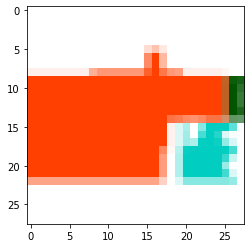

In [25]:
def _visualize_fp(fps):
    # adjusted for different luminance
    channel_to_rgba = np.array(
        [
            [0.0, 0.0, 0.0, 1.0],  # unit mask to alpha
            [0.0, 0.33, 0.0, 0.0],  # entrance to green L30
            [1.0, 0.25, 0.0, 0.0],  # LDK to red L57
            [0.0, 0.26, 1.0, 0.0],  # bedroom to blue L40
            [0.83, 0.87, 0.0, 0.0],  # balcony to yellow L85
            [0.0, 0.81, 0.76, 0.0],
        ]
    )  # bathroom to cyan L75

    # make colors subtractive
    channel_to_rgba[1:6, 0:3] -= 1

    # put it on transparent white
    fps_rgba = np.clip(
        np.array([1.0, 1.0, 1.0, 0.0]) + (np.array(fps) @ channel_to_rgba), 0, 1
    )
    return fps_rgba


def _plot_fp_rgb(six_layers):
    """
    Plot a floorplan with the colors as below:
    LDK: Red, Entrance: Green, Bedroom: Blue
    Balcony: Yellow, Bathroom: Cyan
    """

    plt.figure()
    plt.imshow(_visualize_fp(six_layers))
    pass


# def _fp_from_string(bytes):
#     return np.frombuffer(bytes).reshape(28,28,6)

# _plot_fp_rgb(preprocess_floorplan("/data/fp_img_processed/2112_49_0.png"))

processed = preprocess_floorplan("/data/fp_img_processed/111792_21A_0.png")
print(processed.shape)
print(_visualize_fp(processed).shape)
_plot_fp_rgb(processed)

In [26]:
# The following functions can be used to convert a value to a type compatible
# with tf.Example.
# https://www.tensorflow.org/tutorials/load_data/tf_records


def _bytes_feature(value):
    """Returns a bytes_list from a string / byte."""
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))


def _float_feature(value):
    """Returns a float_list from a float / double."""
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))


def _int64_feature(value):
    """Returns an int64_list from a bool / enum / int / uint."""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))


# https://stackoverflow.com/questions/47861084/how-to-store-numpy-arrays-as-tfrecord


def _floats_array_feature(value):
    """Returns a float_list from a numpy array of floats / doubles."""
    return tf.train.Feature(float_list=tf.train.FloatList(value=value.reshape(-1)))


# int64 array


def _int64s_array_feature(value):
    """Returns an int64_list from a numpy array of ints."""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=value.reshape(-1)))

In [27]:
# tf.train.Feature(float_list=tf.train.FloatList(value=processed.flatten()))
_floats_array_feature(processed)

float_list {
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0

In [28]:
next(rows.itertuples())

Pandas(Index='1298_116', Path='/data/fp_img_processed/1298_116.png', norm_year=0.28, sido_cluster_code=0, norm_log_area=-0.062486742195543336, Rooms=3, Baths=1, brand_booyoung=0, brand_humansia=0, brand_jugong=1, brand_weve=0, brand_ipark=0, brand_epyeonhan=0, brand_lottecastle=0, brand_thesharp=0, brand_prugio=0, brand_raemian=0, brand_hillstate=0, brand_xi=0)

In [29]:
np.asarray(next(rows.itertuples())[7:])

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [30]:
def serialize_example(row):
    """
    Creates a tf.Example message ready to be written to a file.
    """

    # Create a dictionary mapping the feature name to the tf.Example-compatible
    # data type.

    # ['Path', 'id_after', 'norm_year', 'sido_cluster_code',
    #  'norm_log_area', 'area_85', 'Entrance', 'Rooms', 'Baths']

    fp = preprocess_floorplan(row.Path)
    brands = np.asarray(row[7:])

    feature = {
        "floorplan": _floats_array_feature(fp),
        "plan_id": _bytes_feature(row.Index.encode("utf-8")),
        "norm_year": _float_feature(row.norm_year),
        "sido": _int64_feature(row.sido_cluster_code),  # 0~8
        "norm_area": _float_feature(row.norm_log_area),
        "num_rooms": _int64_feature(row.Rooms),  # 1~7
        "num_baths": _int64_feature(row.Baths),  # 1~5
        "brands": _int64s_array_feature(brands), # 0 or 1, 12 dim
    }

    # Create a Features message using tf.train.Example.
    example_proto = tf.train.Example(features=tf.train.Features(feature=feature))

    return example_proto.SerializeToString()


serialize_example(next(rows.itertuples()))[:400]

b'\n\xb5\x94\x01\n\x97\x93\x01\n\tfloorplan\x12\x88\x93\x01\x12\x84\x93\x01\n\x80\x93\x01\xf8\xd35=\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xd2\x1c<=\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xcdW\x1b=\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xd1\xa5_<\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xce\xb96=\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xd2\x1c<=\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xd2\x1c<=\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xd2\x1c<=\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xd2\x1c<=\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xd2\x1c<=\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xd2\x1c<=\

In [31]:
example_proto = tf.train.Example.FromString(serialize_example(next(rows.itertuples())))
example_proto

features {
  feature {
    key: "brands"
    value {
      int64_list {
        value: 0
        value: 0
        value: 1
        value: 0
        value: 0
        value: 0
        value: 0
        value: 0
        value: 0
        value: 0
        value: 0
        value: 0
      }
    }
  }
  feature {
    key: "floorplan"
    value {
      float_list {
        value: 0.04439160227775574
        value: 0.0
        value: 0.0
        value: 0.0
        value: 0.0
        value: 0.0
        value: 0.04592592269182205
        value: 0.0
        value: 0.0
        value: 0.0
        value: 0.0
        value: 0.0
        value: 0.03792553022503853
        value: 0.0
        value: 0.0
        value: 0.0
        value: 0.0
        value: 0.0
        value: 0.013650373555719852
        value: 0.0
        value: 0.0
        value: 0.0
        value: 0.0
        value: 0.0
        value: 0.04461079090833664
        value: 0.0
        value: 0.0
        value: 0.0
        value: 0.0
        va

In [33]:
len(rows),len(rows_train),len(rows_test)

(16045, 12736, 3309)

In [34]:
path_all_tfrecord = "/data/fp85.tfrecord"
path_train_tfrecord = "/data/fp85_train.tfrecord"
path_test_tfrecord = "/data/fp85_test.tfrecord"

options_gzip = tf.python_io.TFRecordOptions(
    compression_type=tf.python_io.TFRecordCompressionType.GZIP
)

errors = []


for (path, rows) in zip(
    [path_all_tfrecord, path_train_tfrecord, path_test_tfrecord],
    [rows, rows_train, rows_test],
):
    with tf.python_io.TFRecordWriter(path=path, options=options_gzip) as writer:
        for row in tqdm(rows.itertuples(), total=len(rows), desc="Processing plans"):
            try:
                serialized_example = serialize_example(row)
                writer.write(serialized_example)
            except:
                errors.append(row[1])


if errors:
    print(errors)

In [19]:
# !ls -al /data/fp*.tfrecord

-rw-r--r-- 1 root root 74689897 Jan 26 08:18 /data/fp.tfrecord
-rw-r--r-- 1 root root 23818932 Feb 13 08:05 /data/fp85.tfrecord
-rw-r--r-- 1 root root 15022271 Jan 29 13:46 /data/fp_test.tfrecord
-rw-r--r-- 1 root root 59673244 Jan 29 13:41 /data/fp_train.tfrecord


In [20]:
raw_dataset = tf.data.TFRecordDataset(path_all_tfrecord, compression_type="GZIP")
raw_dataset

<TFRecordDatasetV1 shapes: (), types: tf.string>

In [21]:
for raw_record in raw_dataset.take(2):  # WARNING: deprecated
    print(repr(raw_record)[:400])

<tf.Tensor: id=20, shape=(), dtype=string, numpy=b'\n\xb5\x94\x01\n\x17\n\x07plan_id\x12\x0c\n\n\n\x081298_116\n\r\n\x04sido\x12\x05\x1a\x03\n\x01\x00\n\x15\n\tnorm_year\x12\x08\x12\x06\n\x04)\\\x8f>\n\x15\n\tnorm_area\x12\x08\x12\x06\n\x04\x19\xf2\x7f\xbd\n\x12\n\tnum_baths\x12\x05\x1a\x03\n\x01\x01\n\x1a\n\x06brands\x12\x10\x1a\x0e\n\x0c\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\n\x12\n\tn
<tf.Tensor: id=21, shape=(), dtype=string, numpy=b'\n\xb5\x94\x01\n\x97\x93\x01\n\tfloorplan\x12\x88\x93\x01\x12\x84\x93\x01\n\x80\x93\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x


In [23]:
def _parse_function(example_proto):
    # Create a description of the features.
    feature_description = {
        "floorplan": tf.io.FixedLenFeature(
            [28, 28, 6], tf.float32, default_value=tf.zeros([28, 28, 6], tf.float32)
        ),
        "plan_id": tf.io.FixedLenFeature([], tf.string, default_value=""),
        "norm_year": tf.io.FixedLenFeature([], tf.float32, default_value=-1.0),
        "sido": tf.io.FixedLenFeature([], tf.int64, default_value=-1),
        "norm_area": tf.io.FixedLenFeature([], tf.float32, default_value=0.0),
        "num_rooms": tf.io.FixedLenFeature([], tf.int64, default_value=-1),
        "num_baths": tf.io.FixedLenFeature([], tf.int64, default_value=-1),
        "brands": tf.io.FixedLenFeature(
            [12], tf.int64, default_value=tf.zeros([12], tf.int64)
        ),
    }

    # Parse the input tf.Example proto using the dictionary above.
    parsed_example = tf.io.parse_single_example(example_proto, feature_description)

    return parsed_example


parsed_dataset = raw_dataset.map(_parse_function)
parsed_dataset

<DatasetV1Adapter shapes: {brands: (12,), floorplan: (28, 28, 6), norm_area: (), norm_year: (), num_baths: (), num_rooms: (), plan_id: (), sido: ()}, types: {brands: tf.int64, floorplan: tf.float32, norm_area: tf.float32, norm_year: tf.float32, num_baths: tf.int64, num_rooms: tf.int64, plan_id: tf.string, sido: tf.int64}>

In [24]:
for parsed_record in parsed_dataset.take(3):
    print(repr(parsed_record))

{'brands': <tf.Tensor: id=120, shape=(12,), dtype=int64, numpy=array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])>, 'floorplan': <tf.Tensor: id=121, shape=(28, 28, 6), dtype=float32, numpy=
array([[[0.0443916 , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.04592592, 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.03792553, 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        ...,
        [0.04592592, 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.03442438, 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ]],

       [[0.99999994, 0.        , 0.        , 0.        , 0.83851844,
         0.        ],
        [0.99999994, 0.        , 0.        , 0.        , 0.83851844,
         0.        ],
        [0.99863   , 0.        , 0.49956647, 0.        , 0.18080726,
     